# Code Submission

*Insert your student number and name here*

In [2]:
# import required packages here
import pandas as pd
import collections
from ast import literal_eval
from itertools import permutations
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

!pip install matplotlib
import matplotlib.pyplot as plt

#for experimenting with the data
!pip install apyori 
!pip install pyspark
#from apyori import apriori
#import pyspark
#from pyspark.ml.fpm import FPGrowth

In [3]:
#loading our data into a dataframe using pandas
df = pd.read_csv('basket.csv')

print(df.shape) #to see overall shape
print(df.shape[1]) #column
print(df.shape[0]) #rows
print(df.columns) 

(15206, 12)
12
15206
Index(['ID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')


In [4]:
# Use df.head() to see the first 8 rows of the df
df.head(8)

,ID,0,1,2,3,4,5,6,7,8,9,10
0,1,whole milk,eggs,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,whole milk,eggs,white bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,whole milk,eggs,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,whole milk,eggs,whipped/sour cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Set the index of the df to the Transaction_ID column
df.set_index('ID', inplace=True)
# Use df.head() to see the first 3 rows of the df
df.head(3)


,0,1,2,3,4,5,6,7,8,9,10
ID,,,,,,,,,,,
1,whole milk,eggs,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,eggs,white bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Use the pandas describe method to get an overview of the dataset
df.describe

<bound method NDFrame.describe of                 0       1                    2        3        4    5    6  \
ID                                                                           
1      whole milk    eggs          salty snack      NaN      NaN  NaN  NaN   
2      whole milk    eggs          white bread   yogurt      NaN  NaN  NaN   
3      whole milk    eggs                  NaN      NaN      NaN  NaN  NaN   
4      whole milk    eggs                  NaN      NaN      NaN  NaN  NaN   
5      whole milk    eggs                  NaN      NaN      NaN  NaN  NaN   
...           ...     ...                  ...      ...      ...  ...  ...   
15202        eggs  yogurt  specialty chocolate      NaN      NaN  NaN  NaN   
15203     vinegar  yogurt          white bread  ketchup  mustard  NaN  NaN   
15204    dog food  yogurt          brown bread      NaN      NaN  NaN  NaN   
15205       honey  yogurt                 rice      NaN      NaN  NaN  NaN   
15206     popcorn  yogurt     

In [30]:
# create a list of lists, where each list contains the items in a given transaction
cols = [i for i in df.columns]
print(cols) #just to verify and check numberic values of columns

df_split = pd.DataFrame(df.values.tolist(),columns=cols)
df_split.head()


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,eggs,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,eggs,white bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
transactions = [] # instantiate an empty list

# iterate through each row and column to create the list
for i in range(0, len(df_split)): 
    transactions.append([str(df_split.values[i,j]) for j in range(0, len(df_split.columns))])

print(transactions[:2]) # look at first two lists
print (len(transactions)) #total number of transactions

[['whole milk', 'eggs', 'salty snack', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole milk', 'eggs', 'white bread', 'yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']]
15206


In [32]:
# from your list of lists, create a flattened list that contains all items purchased
flattened = [item for transaction in transactions for item in transaction]

print(flattened[:2])

len(flattened)
print(len(flattened)) # view the legnth of the list

['whole milk', 'eggs']
167266


In [33]:
# create a list of unique items from the flattened list
# use the set() method because a set by definition contains only unique items
items = list(set(flattened))

# print the count of unique items which is the length of the list
print('# of items:',len(items))

# sort items alphabeitcally
items.sort() 
print(items)# print out how many unique items we have

# of items: 149
['abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake', 'candles', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'champagne', 'cheese', 'chewing gum', 'chicken', 'chocolate', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'decalcifier', 'dental care', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'eggs', 'fish', 'flaxseed', 'flour', 'flower (seeds)', 'frozen fish', 'frozen fruits', 'frozen meal', 'frozen meals', 'frozen potato products', 'frozen vegetables', 'fruit/vegetable juice', 'grapes', 'hair spray', 'ham', 'hard cheese', 'herbs', 'honey', 'house keeping products', 'hygiene articles', 'ice cream', 'jam', 'jam cheese', 'ketchup', 'kitchen towels', '

In [34]:

# generate the itemset permutations up to 2-itemsets
rules = list(permutations(items, 2))
print('# of rules:',len(rules)) # print out the number of rules
print(rules[:3]) # print some of the elements of the list of rules

#Experiment to generate itemsets upto 3-itemsets
rules1a = list(permutations(items, 3))
print('# of rules:',len(rules1a)) # print out the number of rules
print(rules1a[:3]) # print some of the elements of the list of rules

# of rules: 22052
[('abrasive cleaner', 'artif. sweetener'), ('abrasive cleaner', 'baby cosmetics'), ('abrasive cleaner', 'bags')]
# of rules: 3241644
[('abrasive cleaner', 'artif. sweetener', 'baby cosmetics'), ('abrasive cleaner', 'artif. sweetener', 'bags'), ('abrasive cleaner', 'artif. sweetener', 'baking powder')]


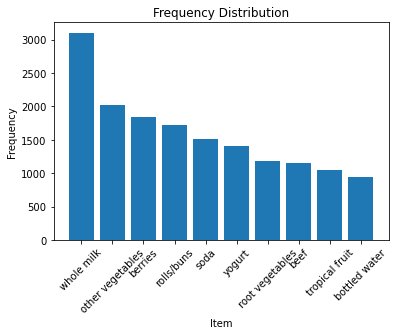

In [87]:
# generate the frequency counts for each unique item in the dataset
item_freq = collections.Counter(flattened)

#Visualization for common items
most_common=item_freq.most_common()
x= [item[0] for item in most_common[1:11]]
y= [item[1] for item in most_common[1:11]]

plt.bar(x, y)
plt.title('Frequency Distribution')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [36]:
# one-hot encode the data and show the first 5 rows of the resulting df
# don't forget to drop the 'nan' value
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
df_onehot = pd.DataFrame(onehot, columns=encoder.columns_).drop('nan', axis=1)
df_onehot.head()


,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [105]:
# Generate frequent itemsets with a minimum support of 10%
df_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)
df_itemsetsf = fpgrowth(df_onehot, min_support=0.1, use_colnames=True)
print('The itemsets generated by Apriori for 10% minimum support are',df_itemsets.shape[0])
print('The itemsets generated by FPGrowth for 10% minimum support are',df_itemsetsf.shape[0])
#%timeit apriori(df_onehot, min_support=0.1, use_colnames=True)
#%timeit fpgrowth(df_onehot, min_support=0.1, use_colnames=True)

# Generate frequent itemsets with a minimum support of 1%
df_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)
df_itemsetsf = fpgrowth(df_onehot, min_support=0.01, use_colnames=True)
print('The itemsets generated by Apriori for 1% minimum support are',df_itemsets.shape[0])
print('The itemsets generated by FPGrowth for 1% minimum support are',df_itemsetsf.shape[0])
#%timeit apriori(df_onehot, min_support=0.01, use_colnames=True)
#%timeit fpgrowth(df_onehot, min_support=0.01, use_colnames=True)

# Generate frequent itemsets with a minimum support of 0.1%
df_itemsets = apriori(df_onehot, min_support=0.001, use_colnames=True)
df_itemsetsf = fpgrowth(df_onehot, min_support=0.001, use_colnames=True)
print('The itemsets generated by Apriori for 0.1% minimum support are',df_itemsets.shape[0])
print('The itemsets generated by FPGrowth for 0.1% minimum support are',df_itemsetsf.shape[0])
#timeit apriori(df_onehot, min_support=0.001, use_colnames=True)
#%timeit fpgrowth(df_onehot, min_support=0.001, use_colnames=True)


# Generate frequent itemsets with a minimum support of 0.5%
df_itemsets = apriori(df_onehot, min_support=0.005, use_colnames=True)
df_itemsetsf = fpgrowth(df_onehot, min_support=0.005, use_colnames=True)
print('The itemsets generated by Apriori for 0.5% minimum support are',df_itemsets.shape[0])
print('The itemsets generated by FPGrowth for 0.5% minimum support are',df_itemsetsf.shape[0])
#%timeit apriori(df_onehot, min_support=0.005, use_colnames=True)
#%timeit fpgrowth(df_onehot, min_support=0.005, use_colnames=True)




#df_itemsets.sort_values(by=['support'], ascending=False)

The itemsets generated by Apriori for 10% minimum support are 4
The itemsets generated by FPGrowth for 10% minimum support are 4
The itemsets generated by Apriori for 1% minimum support are 68
The itemsets generated by FPGrowth for 1% minimum support are 68
The itemsets generated by Apriori for 0.1% minimum support are 762
The itemsets generated by FPGrowth for 0.1% minimum support are 762
The itemsets generated by Apriori for 0.5% minimum support are 133
The itemsets generated by FPGrowth for 0.5% minimum support are 133


In [106]:
# generate association rules with a confidence threshold of 10% and support as 0.5%
rules_df = association_rules(df_itemsets, metric='confidence', min_threshold=0.1)

# how many rules are generated?
print('Number of rules generated with minimum(s)= 0.5% and minimum(c)=10% is', rules_df.shape[0])
rules_df.head(8)

Number of rules generated with minimum(s)= 0.5% and minimum(c)=10% is 42


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.074510,0.128568,0.009930,0.133274,1.036610,0.000351,1.005431
1,(beef),(whole milk),0.074510,0.191109,0.011048,0.148279,0.775887,-0.003191,0.949714
2,(bottled beer),(berries),0.045311,0.116336,0.005590,0.123367,1.060442,0.000319,1.008021
3,(bottled water),(berries),0.060108,0.116336,0.006116,0.101751,0.874629,-0.000877,0.983763
4,(berries),(other vegetables),0.116336,0.128568,0.013218,0.113624,0.883764,-0.001739,0.983140
5,(other vegetables),(berries),0.128568,0.116336,0.013218,0.102813,0.883764,-0.001739,0.984928
6,(pastry),(berries),0.051098,0.116336,0.005787,0.113256,0.973529,-0.000157,0.996527
7,(soda),(berries),0.095226,0.116336,0.009667,0.101519,0.872642,-0.001411,0.983510


In [113]:
#To see rules generated by FPGrowth to be the same as Apriori
rules_dff = association_rules(df_itemsetsf, metric='confidence', min_threshold=0.1)
print('Number of rules generated with minimum(s)= 0.5% and minimum(c)=10% is', rules_dff.shape[0])
rules_dff.head(8)


Number of rules generated with minimum(s)= 0.5% and minimum(c)=10% is 42


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(whole milk),0.049717,0.191109,0.015520,0.312169,1.633464,0.006019,1.176003
1,(eggs),(other vegetables),0.049717,0.128568,0.006708,0.134921,1.049413,0.000316,1.007344
2,(yogurt),(whole milk),0.088781,0.191109,0.013482,0.151852,0.794583,-0.003485,0.953715
3,(berries),(yogurt),0.116336,0.088781,0.012429,0.106840,1.203414,0.002101,1.020220
4,(yogurt),(berries),0.088781,0.116336,0.012429,0.140000,1.203414,0.002101,1.027517
5,(white bread),(whole milk),0.035644,0.191109,0.006313,0.177122,0.926811,-0.000499,0.983002
6,(white bread),(other vegetables),0.035644,0.128568,0.006116,0.171587,1.334602,0.001533,1.051929
7,(rolls/buns),(whole milk),0.108181,0.191109,0.016770,0.155015,0.811136,-0.003905,0.957285


In [108]:
# print out the rules sorted by lift

#print(rules_df.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(8))
#print(rules_dff.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(8))

rules_df.sort_values(by=['confidence'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(8)

,antecedents,consequents,support,confidence,lift,leverage
21,(eggs),(whole milk),0.015520,0.312169,1.633464,0.006019
11,(bottled beer),(whole milk),0.008089,0.178520,0.934126,-0.000570
40,(white bread),(whole milk),0.006313,0.177122,0.926811,-0.000499
23,(newspapers),(whole milk),0.006708,0.174061,0.910798,-0.000657
26,(root vegetables),(other vegetables),0.013087,0.171997,1.337790,0.003304
28,(white bread),(other vegetables),0.006116,0.171587,1.334602,0.001533
14,(butter),(whole milk),0.005590,0.161290,0.843971,-0.001033
36,(shopping bags),(whole milk),0.007431,0.158931,0.831626,-0.001505


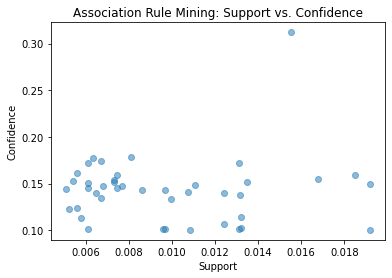

In [110]:
# Generate association rules using confidence and minimum support thresholds
rules_df = association_rules(df_itemsets, metric='confidence', min_threshold=0.1)

# Plot scatter plot of support vs. confidence
plt.scatter(rules_df['support'], rules_df['confidence'], alpha=0.5)

# Set axis labels and title
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rule Mining: Support vs. Confidence')

# Show the plot
plt.show()

In [114]:
#Experimenting to find a good minimum support value
#Generate frequent itemsets with a minimum support of 0.1%
df_itemsets = apriori(df_onehot, min_support=0.001, use_colnames=True)
df_itemsetsf = fpgrowth(df_onehot, min_support=0.001, use_colnames=True)
print('The itemsets generated by Apriori for 0.1% minimum support are',df_itemsets.shape[0])
print('The itemsets generated by FPGrowth for 0.1% minimum support are',df_itemsetsf.shape[0])
#timeit apriori(df_onehot, min_support=0.001, use_colnames=True)
#%timeit fpgrowth(df_onehot, min_support=0.001, use_colnames=True)

rules_df = association_rules(df_itemsets, metric='confidence', min_threshold=0.1)
rules_df.sort_values(by=['confidence'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(8)


The itemsets generated by Apriori for 0.1% minimum support are 762
The itemsets generated by FPGrowth for 0.1% minimum support are 762


,antecedents,consequents,support,confidence,lift,leverage
212,"(eggs, whole milk, root vegetables)",(other vegetables),0.001250,0.826087,6.425309,0.001055
211,"(eggs, whole milk, other vegetables)",(root vegetables),0.001250,0.655172,8.610676,0.001104
181,"(chicken, root vegetables)",(other vegetables),0.001578,0.648649,5.045193,0.001265
196,"(white bread, root vegetables)",(other vegetables),0.002696,0.611940,4.759675,0.002130
184,"(eggs, root vegetables)",(other vegetables),0.002762,0.591549,4.601073,0.002162
214,"(whole milk, other vegetables, root vegetables)",(eggs),0.001250,0.487179,9.799010,0.001122
213,"(eggs, other vegetables, root vegetables)",(whole milk),0.001250,0.452381,2.367139,0.000722
152,"(root vegetables, beef)",(other vegetables),0.003091,0.451923,3.515060,0.002212


In [59]:
#taking a new example for market basket analysis and how it varies from data to data
#just experimenting/playing around with new data
df2 = pd.read_csv('Market_Basket_Optimisation.csv')

In [62]:
df2.head(8)
print(df2.columns) 

Index(['Index', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20'],
      dtype='object')


In [63]:
cols2 = [i for i in range(0,21)]
df_split2 = pd.DataFrame(df2.values.tolist(),columns=cols2)
df_split2.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,2,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
transactions2 = []

for i in range(0, len(df_split2)): 
    transactions2.append([str(df_split2.values[i,j]) for j in range(0, len(df_split2.columns))])

print (len(transactions2))
#transactions2[:2]

7501


In [65]:
flattened2 = [item for transaction in transactions2 for item in transaction]
print(len(flattened2))

157521


In [66]:
items2 = list(set(flattened2))

# print the count of unique items which is the length of the list
print('# of items:',len(items2))


# of items: 7622


In [67]:
rules2 = list(permutations(items2, 2))
print('# of rules:',len(rules2))
print(rules2[:3])

# of rules: 58087262
[('3545', '3671'), ('3545', '6180'), ('3545', '1698')]


In [68]:
item_freq2 = collections.Counter(flattened2)
item_freq2.most_common()



[('nan', 120657),
 ('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713),
 ('burgers', 654),
 ('cake', 608),
 ('cookies', 603),
 ('escalope', 595),
 ('low fat yogurt', 574),
 ('shrimp', 536),
 ('tomatoes', 513),
 ('olive oil', 494),
 ('frozen smoothie', 475),
 ('turkey', 469),
 ('chicken', 450),
 ('whole wheat rice', 439),
 ('grated cheese', 393),
 ('cooking oil', 383),
 ('soup', 379),
 ('herb & pepper', 371),
 ('honey', 356),
 ('champagne', 351),
 ('fresh bread', 323),
 ('salmon', 319),
 ('brownies', 253),
 ('avocado', 250),
 ('hot dogs', 243),
 ('cottage cheese', 239),
 ('tomato juice', 228),
 ('butter', 226),
 ('whole wheat pasta', 221),
 ('red wine', 211),
 ('yogurt cake', 205),
 ('light mayo', 204),
 ('energy bar', 203),
 ('ham', 203),
 ('energy drink', 200),
 ('pepper', 199),
 ('vegetables mix', 193),
 ('cereals', 193

In [69]:
# create an encoder object that is fit to our list of lists we created earlier
encoder2 = TransactionEncoder().fit(transactions2)
onehot2 = encoder2.transform(transactions2)
df_onehot2 = pd.DataFrame(onehot2, columns=encoder2.columns_).drop('nan', axis=1)
df_onehot.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [70]:
# Generate frequent itemsets with a minimum support of 0.5%
df_itemsets2 = apriori(df_onehot2, min_support=0.005, use_colnames=True)
#df_itemsets.shape
df_itemsets2.sort_values(by=['support'], ascending=False)

,support,itemsets
60,0.238368,(mineral water)
27,0.179709,(eggs)
83,0.174110,(spaghetti)
33,0.170911,(french fries)
20,0.163845,(chocolate)
...,...,...
646,0.005066,"(eggs, tomatoes, mineral water)"
648,0.005066,"(eggs, spaghetti, olive oil)"
674,0.005066,"(soup, frozen vegetables, mineral water)"
680,0.005066,"(ground beef, mineral water, grated cheese)"


In [71]:
%timeit apriori(df_onehot2, min_support=0.05, use_colnames=True)
%timeit fpgrowth(df_onehot2, min_support=0.05, use_colnames=True)

107 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
129 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
# generate association rules with a confidence threshold of 10%
rules_df2 = association_rules(df_itemsets2, metric='confidence', min_threshold=0.3)
rules_df2.shape
# how many rules are generated?
rules_df2
# print out the rules sorted by lift


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(eggs),0.020397,0.179709,0.006532,0.320261,1.782108,0.002867,1.206774
1,(almonds),(mineral water),0.020397,0.238368,0.007599,0.372549,1.562914,0.002737,1.213851
2,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
3,(black tea),(mineral water),0.014265,0.238368,0.005333,0.373832,1.568295,0.001932,1.216337
4,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
...,...,...,...,...,...,...,...,...,...
256,"(turkey, mineral water)",(spaghetti),0.019197,0.174110,0.006399,0.333333,1.914497,0.003057,1.238835
257,"(spaghetti, turkey)",(mineral water),0.016531,0.238368,0.006399,0.387097,1.623945,0.002459,1.242662
258,"(spaghetti, whole wheat rice)",(mineral water),0.014131,0.238368,0.006266,0.443396,1.860131,0.002897,1.368355
259,"(whole wheat rice, mineral water)",(spaghetti),0.020131,0.174110,0.006266,0.311258,1.787709,0.002761,1.199129


In [112]:
rules_df2.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction'])

,antecedents,consequents,support,confidence,lift,leverage
16,(pasta),(escalope),0.005866,0.372881,4.700812,0.004618
66,(pasta),(shrimp),0.005066,0.322034,4.506672,0.003942
210,"(herb & pepper, spaghetti)",(ground beef),0.006399,0.393443,4.004360,0.004801
208,"(herb & pepper, mineral water)",(ground beef),0.006666,0.390625,3.975683,0.004989
30,(tomato sauce),(ground beef),0.005333,0.377358,3.840659,0.003944
...,...,...,...,...,...,...
20,(fresh bread),(mineral water),0.013332,0.309598,1.298820,0.003067
60,(turkey),(mineral water),0.019197,0.307036,1.288075,0.004293
61,(vegetables mix),(mineral water),0.007866,0.305699,1.282467,0.001732
88,"(spaghetti, burgers)",(mineral water),0.006532,0.304348,1.276797,0.001416
